# **Forecasting : Air Pollution**
Project ini kami lakukan dengan tujuan untuk memenuhi tugas dari bagian proses recruitment lab AILO.

Dataset Pollution yang kita ambil memiliki beberapa features:
1. date (tanggal)
2. pollution (polusi)
3. dew (embun)
4. temp (tempratur dalam celcius)
5. press (tekanan udara)
6. wnd_dir (arah mata angin)
7. wnd_spd (kecepatan angin)
8. snow (ketebalan salju dalam inch)
9. rain (intensitas hujan)

-- tidak ada null values --

# Library and Dataframe Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/SyahrezaAdnanAlAzhar/Forecasting_AILO/main/LSTM-Multivariate_pollution.csv")

# Dataframe Information

In [ ]:
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


dataframe memiliki 43_800 rows, yang dimana masing-masing rows adalah data per jam.

dataset merupakan data dari



*   Polusi
*   Embun

*   Tempratur (dalam celcius)
*   Tekanan Udara

*   Arah mata angin
*   Kecepatan Angin

*   Ketebalan Salju
*   Intensitas Hujan

dari awal tahun **2010** hingga akhir taun **2014**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


dari semua features, hanya **wnd_dir** yang memiliki tipe data bukan numerik

# Exploratory Data Analysis

In [ ]:
df['date'] = pd.to_datetime(df['date'])

def plot_feature(df, feature, title):
    fig, ax = plt.subplots(figsize=(20, 4))
    df.plot('date', feature, ax=ax)
    ax.set_title(title)
    plt.show()



*   mengubah tipe data feature 'date' menjadi date (awalnya object)
*   membuat fungsi plot_feature agar mengurangi pengulangan kode



## Line Plot

### Pollution Line Plot

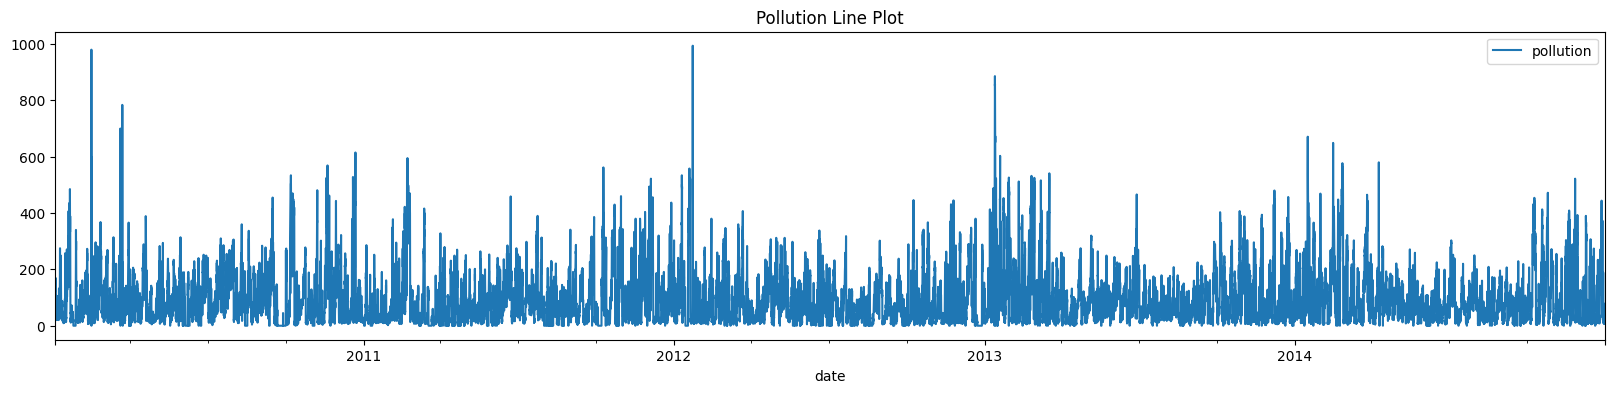

In [ ]:
plot_feature(df, 'pollution', 'Pollution Line Plot')

Dari visualisasi data kita ketahui bahwa hampir di setiap awal tahun (dari **2010-2014**) ada kenaikan polusi yang signifikan

### Dew Line Plot

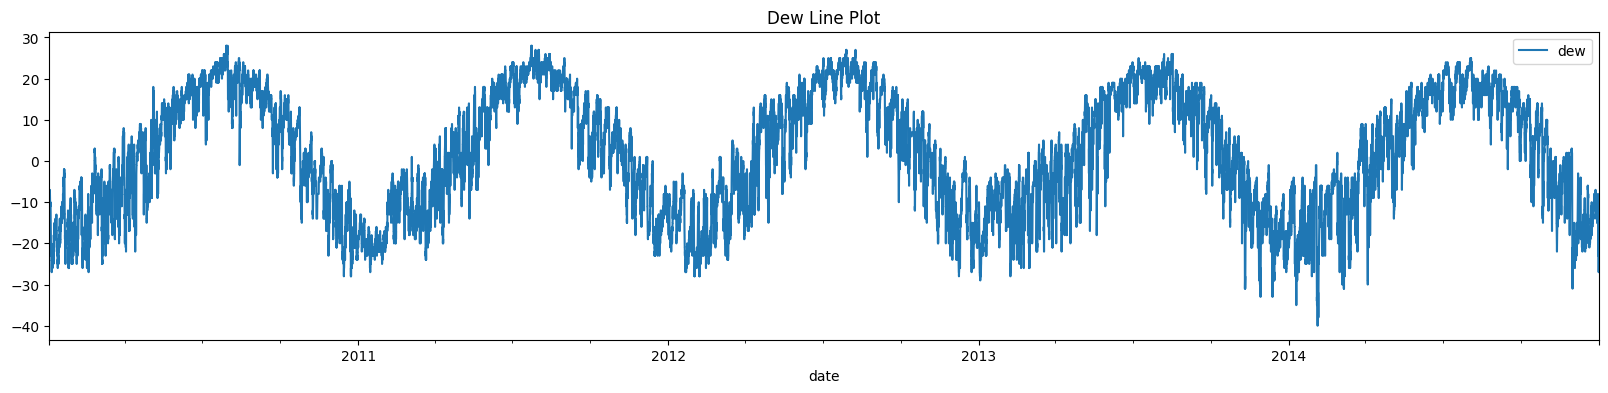

In [ ]:
plot_feature(df, 'dew', 'Dew Line Plot')

### Temprature Line Plot

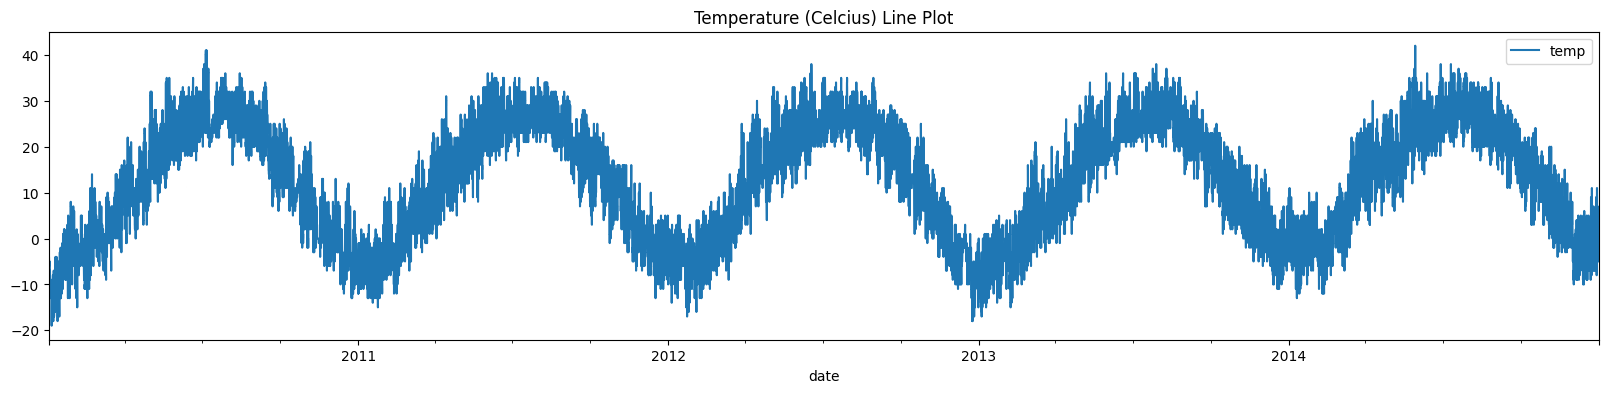

In [ ]:
plot_feature(df, 'temp', 'Temperature (Celcius) Line Plot')

Di setiap pertengahan tahun (**2010-2014**) terjadi kenaikan tempratur yang signifikan (*musim panas)

### Pressure Line Plot

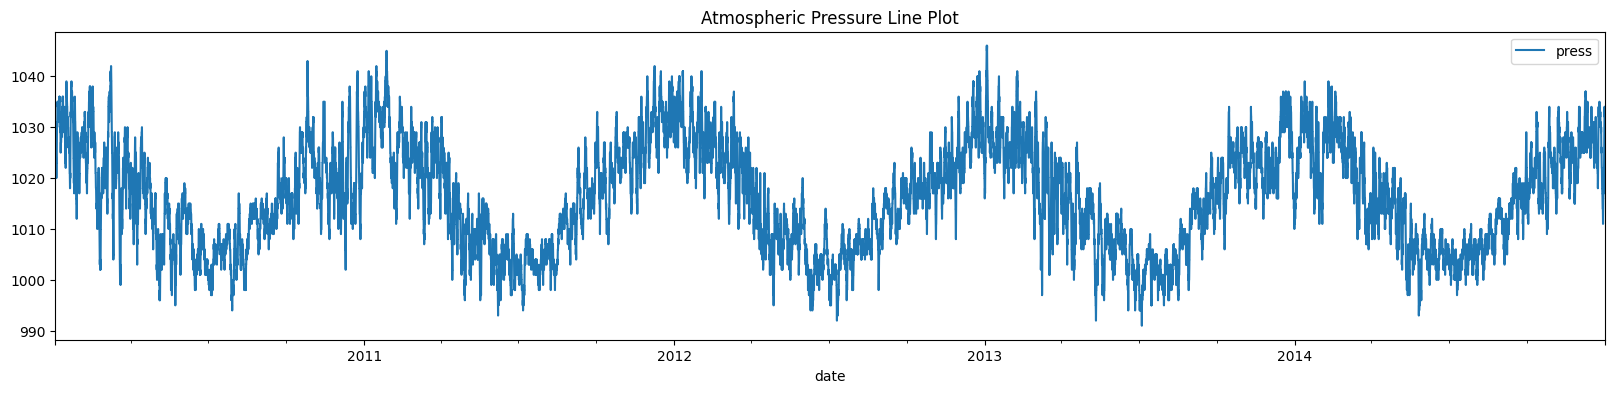

In [ ]:
plot_feature(df, 'press', 'Atmospheric Pressure Line Plot')

### Wind Speed Line Plot

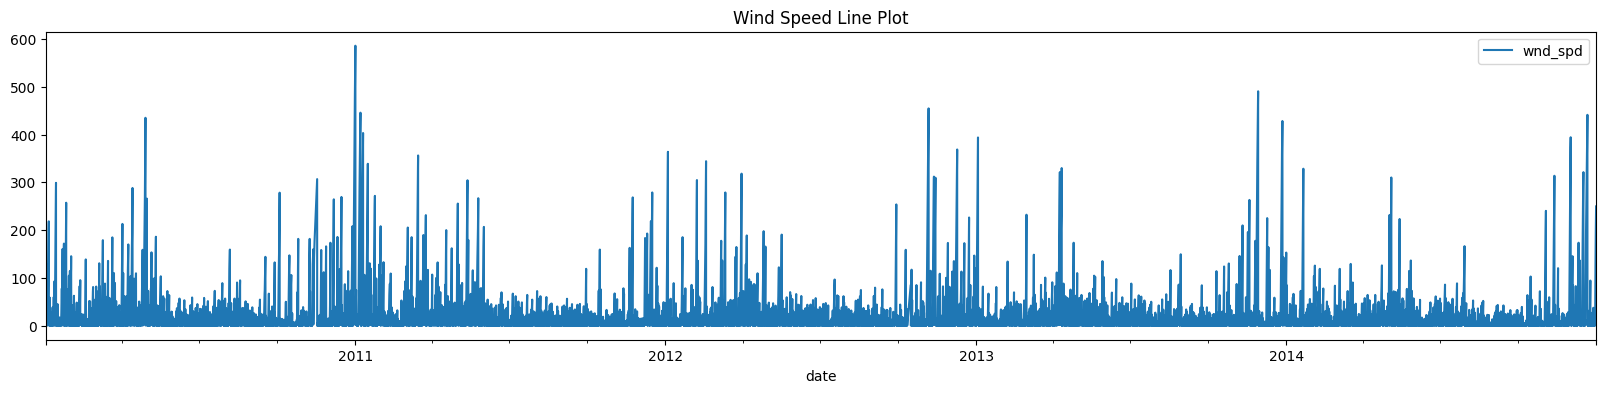

In [ ]:
plot_feature(df, 'wnd_spd', 'Wind Speed Line Plot')

### Snow Line Plot

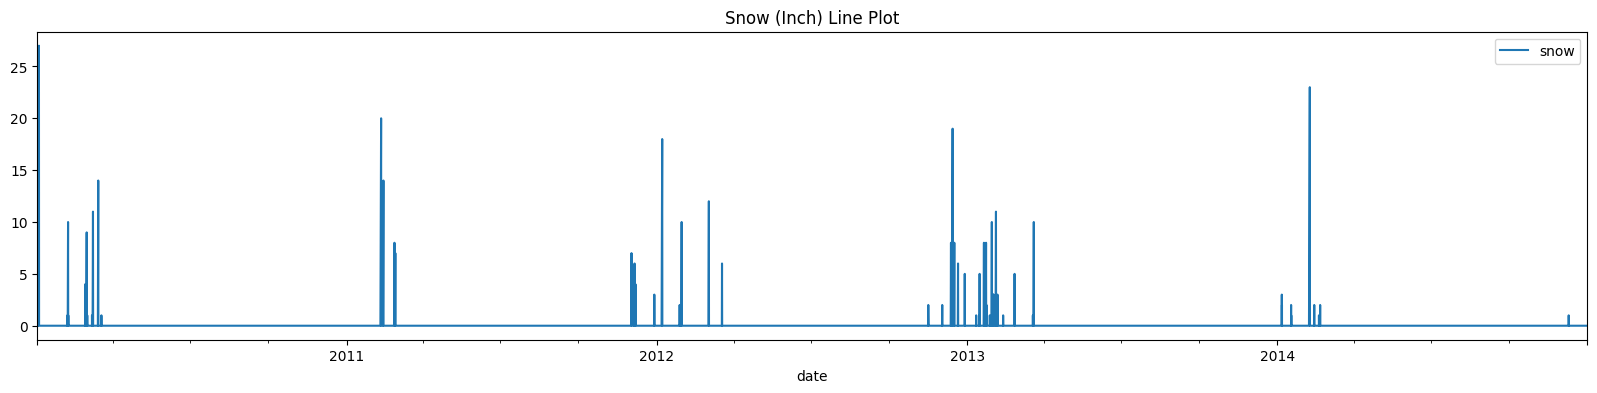

In [ ]:
plot_feature(df, 'snow', 'Snow (Inch) Line Plot')

Salju hanya terjadi pada akhir-awal tahun (*musim salju)

### Rain Line Plot

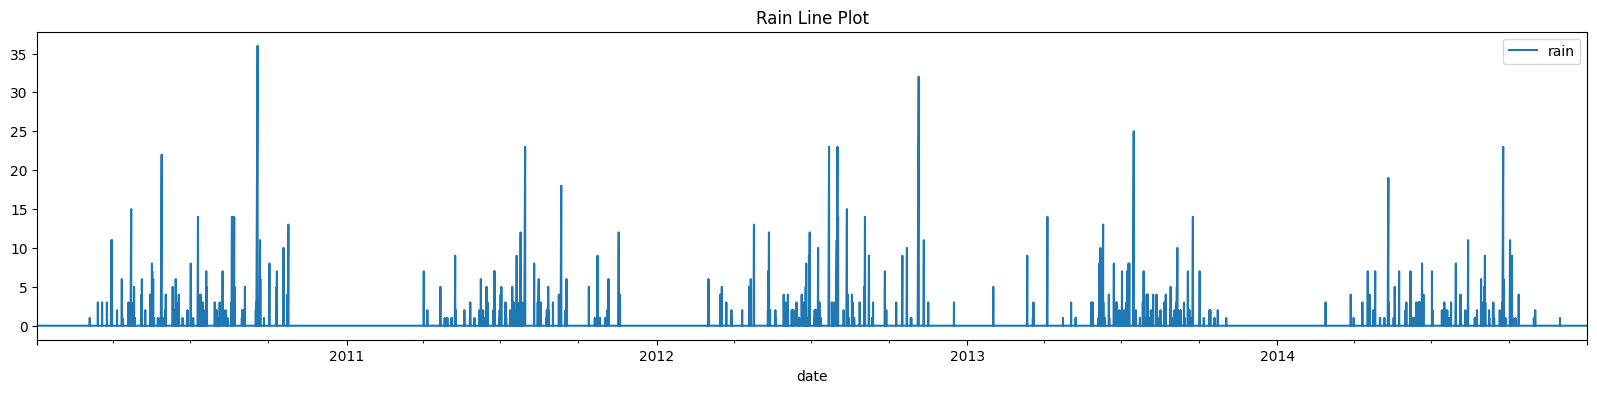

In [ ]:
plot_feature(df, 'rain', 'Rain Line Plot')

kebalikan dari salju, hujan ada di pertengahan tahun. dan dari visualisasi data, jika ada hujan maka tidak ada salju.

## Histogram

In [ ]:
def plot_histogram(df, feature, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    df[feature].plot(kind='hist', ax=ax, edgecolor='black', bins=20)
    ax.set_title(title)
    ax.set_xlabel(feature)
    plt.show()

*   membuat fungsi plot_histogram agar mengurangi pengulangan kode

### Pollution Histogram

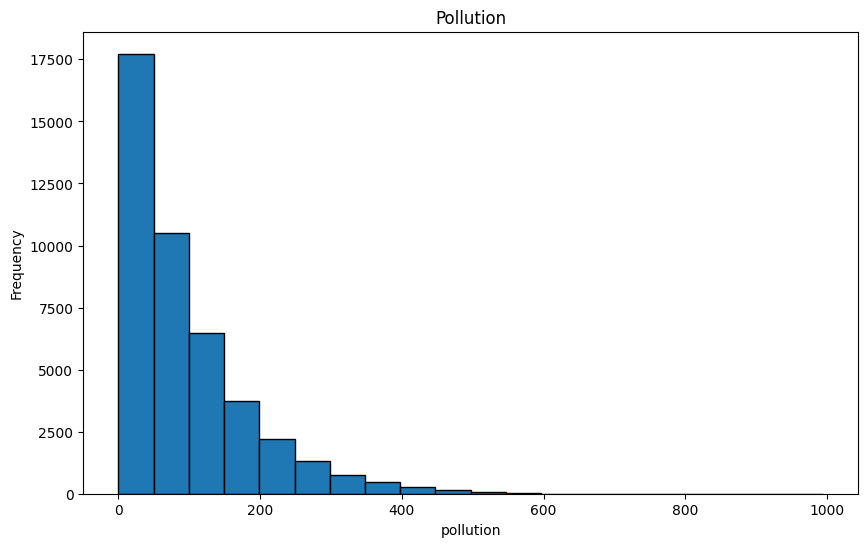

In [ ]:
plot_histogram(df, 'pollution', 'Pollution')

### Dew Histogram

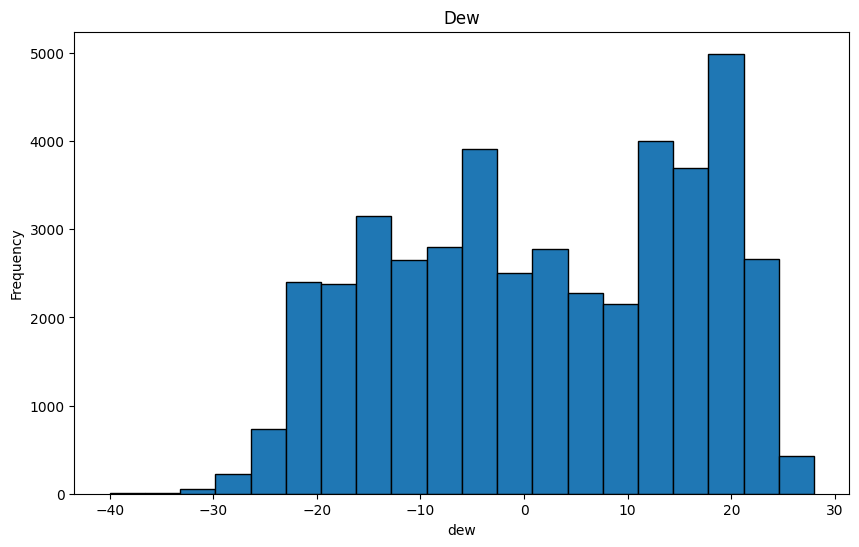

In [ ]:
plot_histogram(df, 'dew', 'Dew')

### Temprature Histogram

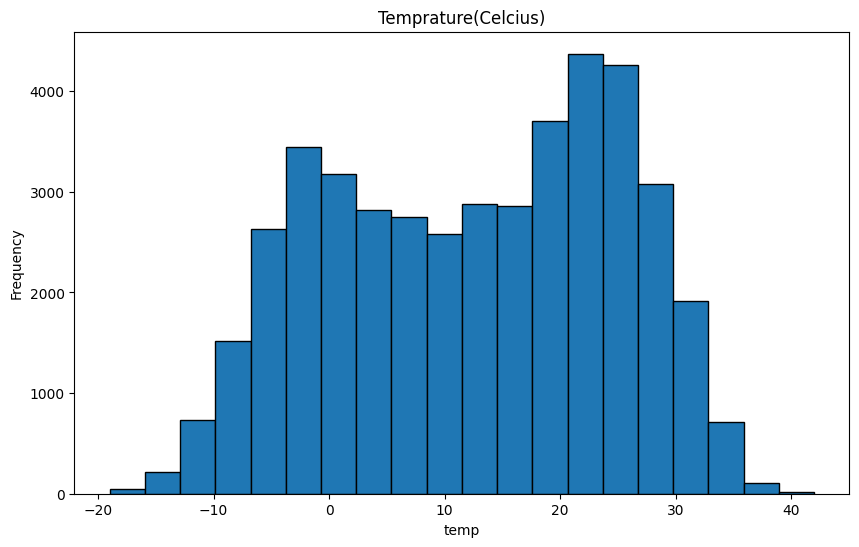

In [ ]:
plot_histogram(df, 'temp', 'Temprature(Celcius)')

### Atmospheric Pressure Histogram

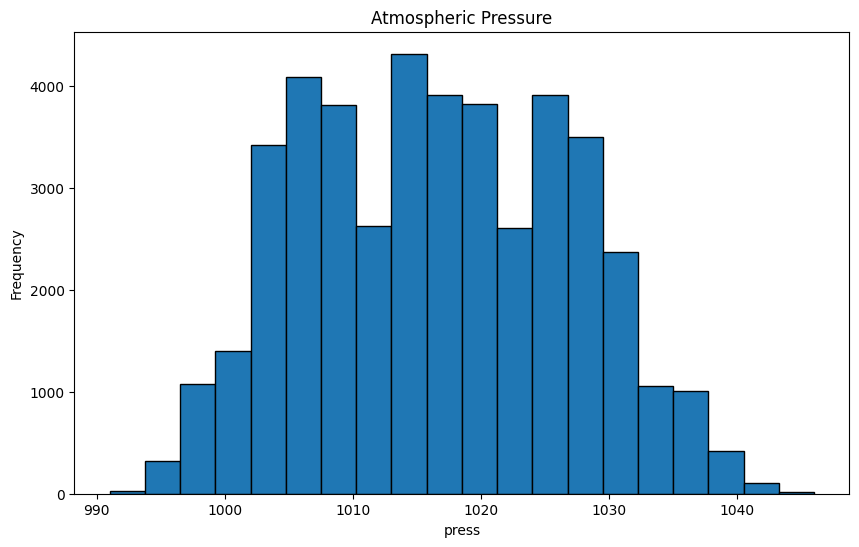

In [ ]:
plot_histogram(df, 'press', 'Atmospheric Pressure')

### Wind Speed Histogram

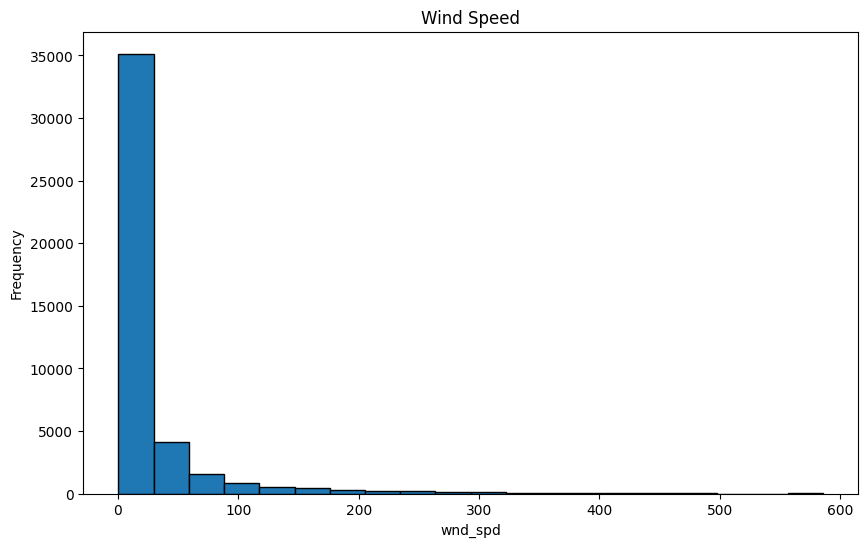

In [ ]:
plot_histogram(df, 'wnd_spd', 'Wind Speed')

### Snow Histogram

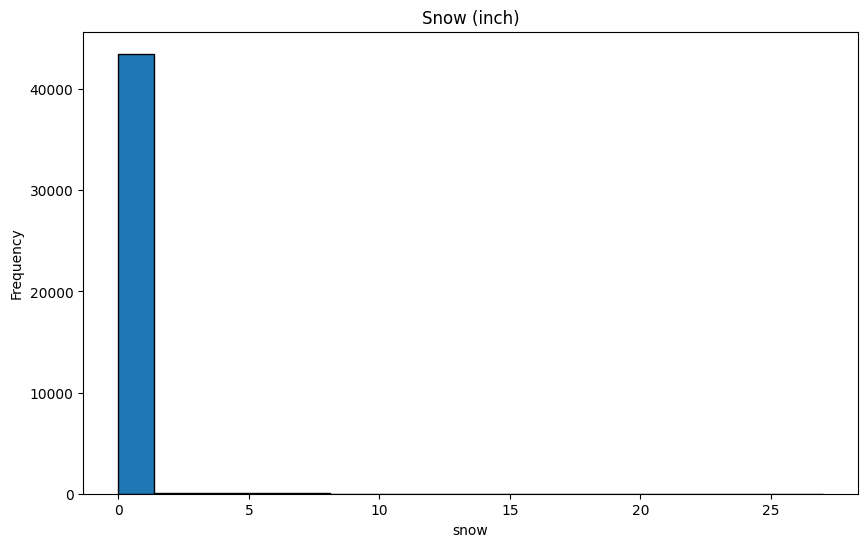

In [ ]:
plot_histogram(df, 'snow', 'Snow (inch)')

### Rain Histogram

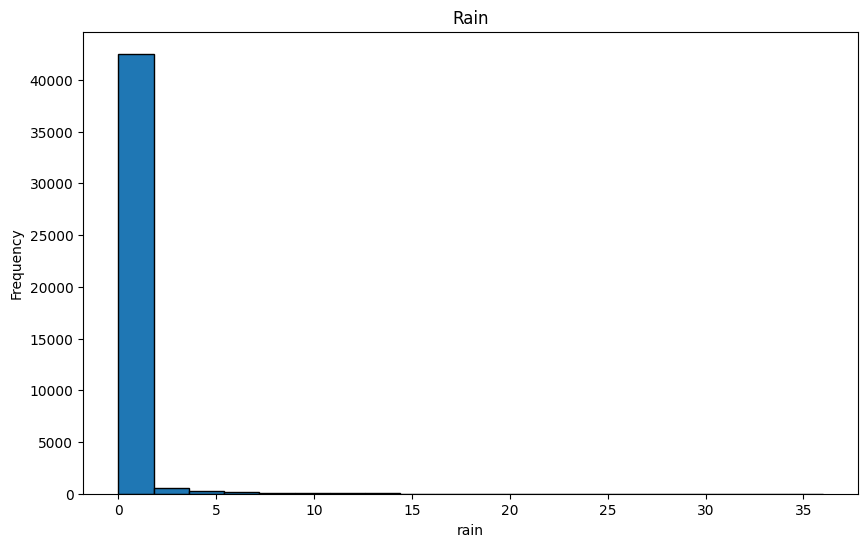

In [ ]:
plot_histogram(df, 'rain', 'Rain')

## Boxplot

<Axes: >

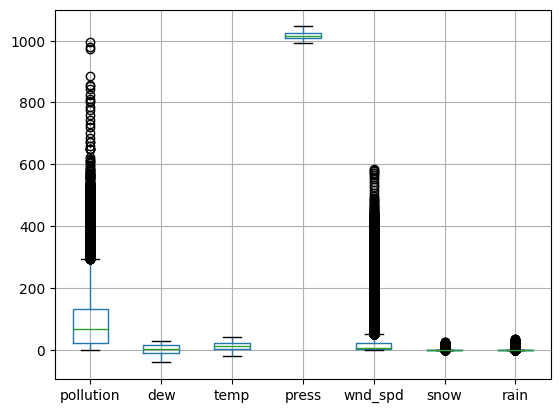

In [ ]:
df.boxplot()

beberapa *feature* memiliki outlier yang cukup banyak. Namun hanya *feature* :


*   Wind Speed
*   Snow
*   Wind Direction

yang kami akan kami atasi,
 *pollution* sengaja tidak diatasi, karena takutnya merusak data






## Correlation

In [ ]:
correlation = df.corr()['pollution']
print(correlation)

pollution    1.000000
dew          0.157585
temp        -0.090798
press       -0.045544
wnd_spd     -0.234362
snow         0.022226
rain        -0.049045
Name: pollution, dtype: float64


<ipython-input-124-93e3aeb00287>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['pollution']


Hampir semua *feature* tidak memiliki korelasi yang cukup kuat dengan *pollution*, namun dikarenakan jumlah *feature* hanya sedikit, jadi kami memutuskan untuk menggunakan semuanya.

# Data Preprocessing

## Snow

In [ ]:
def categorize_snow_value(snow):
  if snow == 0:
    return 0
  elif snow>0:
    return 1

#Applying the function
df['snow'] = df['snow'].apply(categorize_snow_value)

# Display
print(df['snow'].unique())

[0 1]


berdasarkan data diatas, salju hanya terjadi pada akhir-awal tahun. jadi kami memutuskan untuk mengubah value dari snow, menjadi :


*   0 := Tidak Bersalju
*   1 := Bersalju



## Wind Direction

In [ ]:
wind_direction_dummies = pd.get_dummies(df['wnd_dir'], prefix='wind')
df = pd.concat([df, wind_direction_dummies], axis=1)
df = df.drop('wnd_dir', axis=1)
df.head(5)

,date,pollution,dew,temp,press,wnd_spd,snow,rain,wind_NE,wind_NW,wind_SE,wind_cv
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,1,0,0,0,1,0


mengubah feature wnd_dir menjadi binary metriks (0 dan 1) agar mesin dapat mengkomputasi data tersebut.

## Wind Speed

In [ ]:
def replace_outliers_with_mad(df, column_name):
    # Mengambil data kolom yang akan diubah
    column_data = df[column_name]

    # Menghitung Median Absolute Deviation (MAD)
    median = np.median(column_data)
    mad = np.median(np.abs(column_data - median))

    # Menghitung batas atas dan batas bawah untuk menentukan outliers
    lower_limit = median - 3 * 1.4826 * mad
    upper_limit = median + 3 * 1.4826 * mad

    # Menggantikan nilai outliers dengan nilai batas atas atau batas bawah
    df[column_name] = np.clip(column_data, lower_limit, upper_limit)

    return df

#Apllying Function
df = replace_outliers_with_mad(df, 'wnd_spd')
print(df['wnd_spd'].min())
print(df['wnd_spd'].max())

0.45
25.296144


Mengganti value outlier menjadi batas atas (jika melebihi batas atas) dan batas bawah (jika melebihi batas bawah) yang sudah dihitung menggunakan MAD (Mean Absolute Deviation)

## Date

In [ ]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofweek

df = df.drop(columns=['date'])

Mengganti feature date, menjadi year month day hour.
Dan menghapus kolom date

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

temporal_features = df.drop('pollution', axis=1).values  # Drop the target variable
target_variable = df['pollution'].values.reshape(-1, 1)  # Target variable

scaler_target = MinMaxScaler()
target_variable_scaled = scaler_target.fit_transform(target_variable)

scaler_features = MinMaxScaler()
temporal_feature_scaled = scaler_features.fit_transform(temporal_features)

# Combine target variable and temporal features
data_with_temporal_features = np.hstack([target_variable_scaled, temporal_feature_scaled])

# Create sequences for LSTM
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), :]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)




- Membuat variabel temporal_features dan target_variable, setelah itu di scaling agar memiliki value range yang serupa.

- Lalu membuat fungsi **create_dataset**, yang nantinya akan me-return X dan Y (dataset yang sudah berurut sesuai time_stepsnya)


In [ ]:
n_steps = 10
X, y = create_dataset(data_with_temporal_features, n_steps)
number_of_features = data_with_temporal_features.shape[1]
# Train-test split
train_size = int(len(X) * 0.6)
cv_size = int(len(X) * 0.2)
test_size = len(X) - train_size - cv_size

X_train, y_train = X[:train_size], y[:train_size]
X_cv, y_cv = X[train_size:train_size + cv_size], y[train_size:train_size + cv_size]
X_test, y_test = X[train_size + cv_size:], y[train_size + cv_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], n_steps, number_of_features))
X_cv = np.reshape(X_cv, (X_cv.shape[0], n_steps, number_of_features))
X_test = np.reshape(X_test, (X_test.shape[0], n_steps, number_of_features))

Membagi dataset menjadi :     
- 60% := Training Set
- 20% := Cross Validation
- 20% := Testing Set

# Data Modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def build_lstm_model(n):
    input_shape = (n,number_of_features)
    model = Sequential()
    # First LSTM layer
    model.add(LSTM(units=100, return_sequences=True, input_shape=(input_shape)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, kernel_regularizer='l2'))  # L2 regularization
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compiling the model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

lstm_model = build_lstm_model(n_steps)

# Display the model's architecture
lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 10, 100)           45600     
                                                                 
 dropout_17 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_18 (LSTM)              (None, 10, 100)           80400     
                                                                 
 dropout_18 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

- Membuat 4 layer, dan masing-masing layer menggunakan activation function default dari LSTM.
- Menggunakan optimizer Adam(Gradient Descent) dengan learning rate := 0.0001


Epoch 1/50
822/822 [==============================] - 41s 35ms/step - loss: 0.6191 - val_loss: 0.1396
Epoch 2/50
822/822 [==============================] - 29s 35ms/step - loss: 0.0441 - val_loss: 0.0123
Epoch 3/50
822/822 [==============================] - 30s 37ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 4/50
822/822 [==============================] - 37s 45ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 5/50
822/822 [==============================] - 38s 46ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 6/50
822/822 [==============================] - 34s 42ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 7/50
822/822 [==============================] - 29s 36ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 8/50
822/822 [==============================] - 29s 35ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 9/50
822/822 [==============================] - 40s 49ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 10/50
822/822 [==============================] - 33s 40ms/step - loss: 0.002

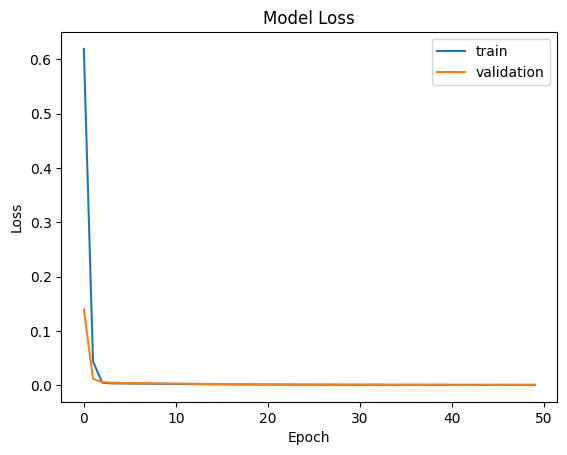

In [ ]:
epochs = 50  # Number of epochs to train for
batch_size = 32  # Size of the batches of data (adjust based on your memory)

history = lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_cv, y_cv),
    shuffle=False
)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Prediction

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print("Evaluation Metrics:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r2)

# Assuming y_test are your true values and model is your trained model
y_pred = lstm_model.predict(X_test)

# If you normalized your target variable, make sure to inverse transform the predictions
y_pred_inverse_transformed = scaler_target.inverse_transform(y_pred)
y_test_inverse_transformed = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
evaluate_model(y_test_inverse_transformed, y_pred_inverse_transformed)


274/274 [==============================] - 4s 10ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 18.45500575079595
Mean Squared Error (MSE): 773.6203261412842
Root Mean Squared Error (RMSE): 27.814031101968737
R-squared (R²): 0.9116487778767064


In [154]:
# Membuat dataframe baru yang menyimpan data actual dan predicted
dfMonthHasil = pd.DataFrame({'Predicted': y_pred_inverse_transformed.ravel(), 'Actual': y_test_inverse_transformed.ravel()})
dfMonthHasil['group'] = (dfMonthHasil.index // (24*30)) + 1

# Menghitung rata-rata setiap kelompok
dfMonth_compressed = dfMonthHasil.groupby('group')['Actual','Predicted'].mean().reset_index(drop=True)


<ipython-input-154-e0ddcb194d74>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfMonth_compressed = dfMonthHasil.groupby('group')['Actual','Predicted'].mean().reset_index(drop=True)


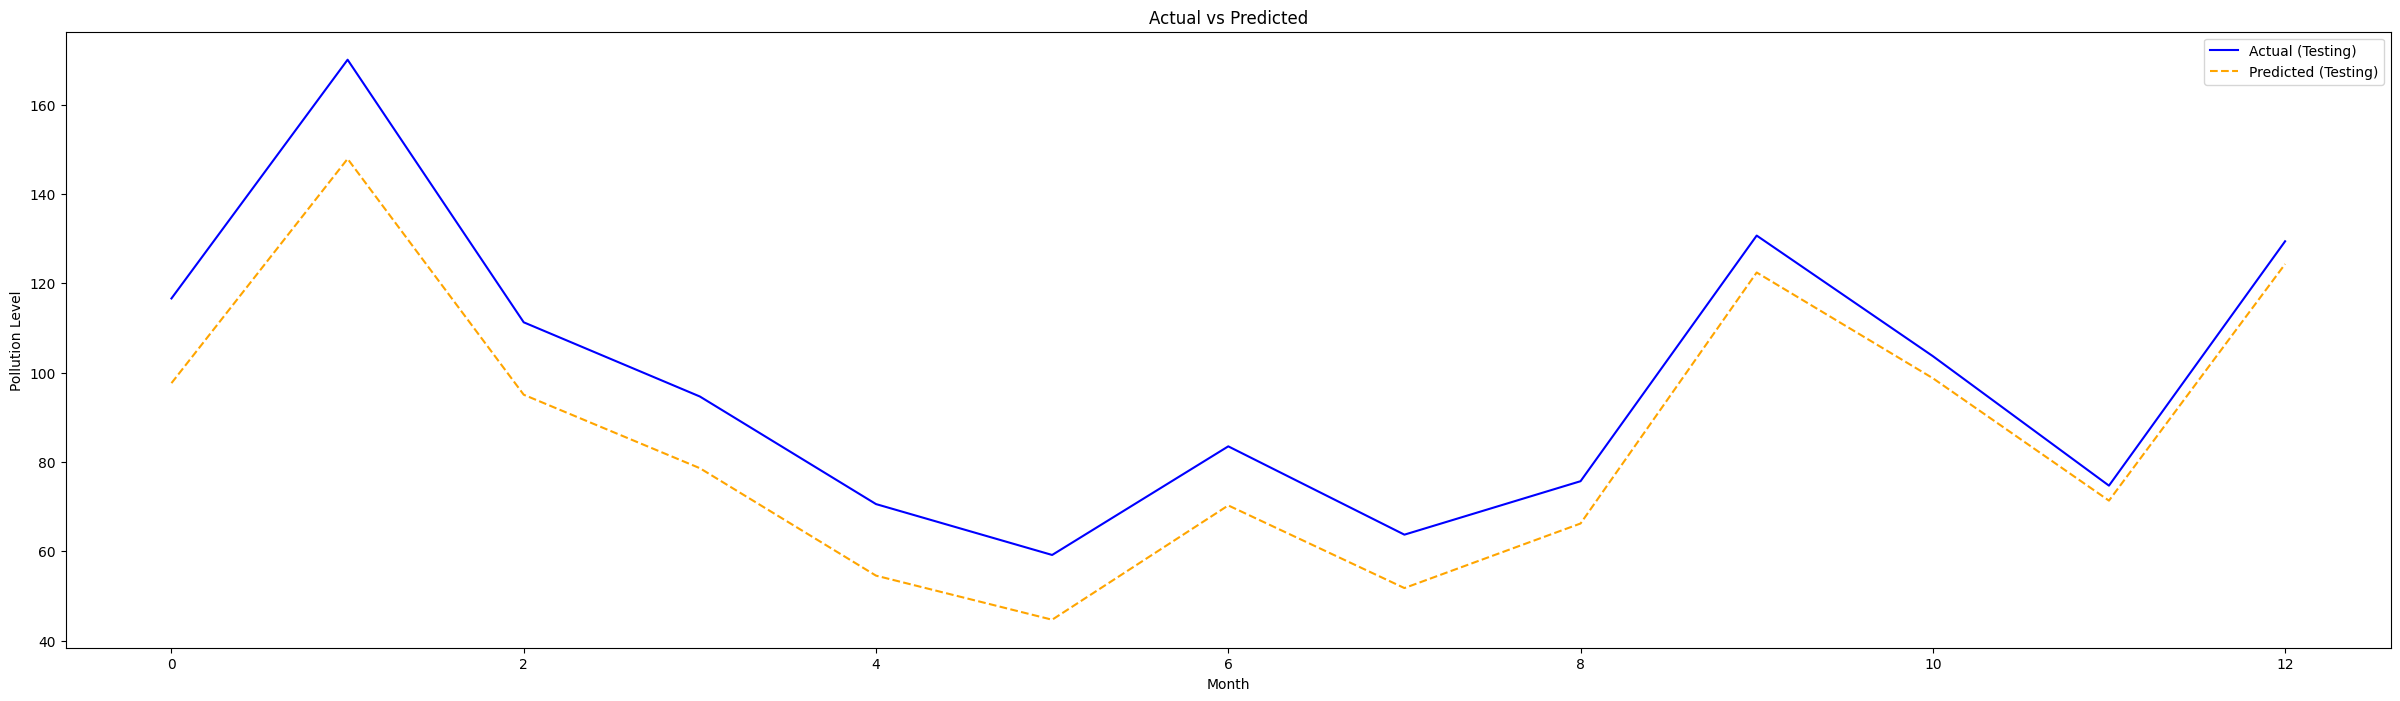

In [160]:
# Visualize Testing Set
plt.figure(figsize=(30, 8))
plt.plot(dfMonth_compressed['Actual'], label='Actual (Testing)', color = 'blue')
plt.plot(dfMonth_compressed['Predicted'], label='Predicted (Testing)', linestyle='dashed', color = 'orange')
plt.title('Actual vs Predicted')
plt.xlabel('Month')
plt.ylabel('Pollution Level')
plt.legend()
plt.show()


Menunjukan grafik perbandingan data prediksi, dan data aktual per bulan selama satu tahun.
Dari data yang sudah ada dan juga prediksi dari model kami, bisa didapat beberapa insight menarik, berikut beberapa :


*   Terdapat pola dimana polusi naik secara signifikan dari akhir tahun sampai awal tahun (titik tertinggi ada di awal tahun).
*   Ketika nilai polusi naik, kecepatan angin pun cenderung naik
*   Walau tidak berhubungan secara langsung, namun polusi terjadi ketika musim dingin / bersalju


---


Mungkin ada beberapa faktor yang menyebabkan terjadinya kenaikan polusi di akhir-awal tahun, berikut beberapa kemungkinan yang dapat terjadi :     


*   Pada musim dingin, **banyak orang menggunakan pemanas di rumah seperti tungku kayu, batu bara, atau pemanas lainnya** yang dapat melepaskan polutan ke udara.
*   Suhu yang lebih rendah dapat mengakibatkan banyak orang **lebih sering menggunakan kendaraan pribadi** daripada menggunakan transportasi umum atau berjalan kaki.

*   Beberapa daerah mungkin mengalami **peningkatan pembakaran sampah dan pembakaran terbuka** pada musim dingin.
*   **Beberapa industri mungkin mengalami peningkatan produksi** atau aktivitas selama musim dingin untuk memenuhi permintaan yang lebih tinggi selama liburan atau kondisi tertentu










Dengan kemampuan model prediktif yang mampu mengantisipasi tingkat polusi di berbagai wilayah, pemerintah dapat merancang dan mengimplementasikan sistem pemantauan online yang bertujuan untuk secara aktif memantau dan menganalisis tingkat polusi udara. Tujuannya adalah untuk mengidentifikasi potensi kenaikan signifikan dalam nilai polusi dan memberikan dasar bagi pemerintah untuk mengambil langkah-langkah mitigasi yang tepat. Sistem pemantauan ini akan menjadi alat yang efektif untuk memastikan respons cepat terhadap perubahan kondisi udara, mengarah pada upaya konkret untuk mengurangi dampak negatif polusi terhadap kesehatan masyarakat dan lingkungan secara keseluruhan.